<a href="https://colab.research.google.com/github/MissTife/Exploratory-Data-Analysis-in-SQL/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task

**This is to test your knowledge on NLP**

Build and train a machine learning model with the provided dataset to classify the news category or topic. You can use any architecture or model, in this test.

**Make sure to plot the accuracy vs epochs and loss vs epochs graphs**

In [ ]:
# i installed the libraries and modules needed for analysis and modelling
!pip install keras
!pip install tensorflow
!pip install scikit-learn

import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import tensorflow as tf
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# i previewed the dataset
df= pd.read_csv("bbc-text.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
#information about the dataset
a=df.groupby('category').describe()
a

text                                                            \
              count unique                                                top   
category                                                                        
business        510    503  economy  strong  in election year uk businesse...   
entertainment   386    369  ocean s twelve raids box office ocean s twelve...   
politics        417    403  super union  merger plan touted two of britain...   
sport           511    504  hantuchova in dubai last eight daniela hantuch...   
tech            401    347  california sets fines for spyware the makers o...   

                    
              freq  
category            
business         2  
entertainment    2  
politics         2  
sport            2  
tech             2

In [ ]:
#to get the shape of the data.
df.shape

(2225, 2)

In [ ]:
# Preprocessing the text in the data
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [stemmer.stem(token) for token in tokens if token.isalpha() and token not in stopwords]
    return ' '.join(tokens)

# Preprocess the text column
df['processed_text'] = df['text'].apply(preprocess_text)

# Tokenize the text using NLTK
df['tokens'] = df['processed_text'].apply(word_tokenize)

# Get vocabulary size and max sequence length
all_tokens = [token for tokens in df['tokens'] for token in tokens]
vocab_size = len(set(all_tokens))
max_sequence_length = max(len(tokens) for tokens in df['tokens'])

In [ ]:
#i encoded the categorical data into numerical data before splitting the data for consistency
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['category_encoded']=label_encoder.fit_transform(df['category'])
print(df['category_encoded'])

0       4
1       0
2       3
3       3
4       1
       ..
2220    0
2221    2
2222    1
2223    2
2224    3
Name: category_encoded, Length: 2225, dtype: int64


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['category_encoded'], test_size=0.2, random_state=42)



In [ ]:
# Tokenize and pad the sequences to ensure that all sequeces have the same length
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)


In [ ]:
#mapping the input words to dense vector of fixed size and prepare the model for training
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
epochs = 10
batch_size = 32
Result=model.fit(train_data, y_train, epochs=epochs, batch_size=batch_size, validation_data=(test_data, y_test))


Epoch 1/10
56/56 [==============================] - 114s 2s/step - loss: -45.6368 - accuracy: 0.1713 - val_loss: -47.0087 - val_accuracy: 0.1820
Epoch 2/10
56/56 [==============================] - 134s 2s/step - loss: -49.7671 - accuracy: 0.1713 - val_loss: -50.0223 - val_accuracy: 0.1820
Epoch 3/10
56/56 [==============================] - 115s 2s/step - loss: -58.9988 - accuracy: 0.1826 - val_loss: -58.2954 - val_accuracy: 0.2989
Epoch 4/10
56/56 [==============================] - 114s 2s/step - loss: -67.6736 - accuracy: 0.2152 - val_loss: -62.9185 - val_accuracy: 0.2854
Epoch 5/10
56/56 [==============================] - 115s 2s/step - loss: -73.8427 - accuracy: 0.2489 - val_loss: -67.0778 - val_accuracy: 0.3213
Epoch 6/10
56/56 [==============================] - 110s 2s/step - loss: -79.0057 - accuracy: 0.2562 - val_loss: -72.4740 - val_accuracy: 0.3146
Epoch 7/10
56/56 [==============================] - 110s 2s/step - loss: -84.1242 - accuracy: 0.2663 - val_loss: -77.7947 - val_ac

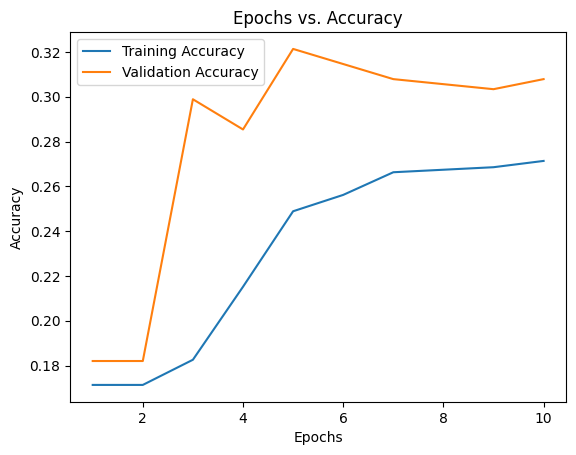

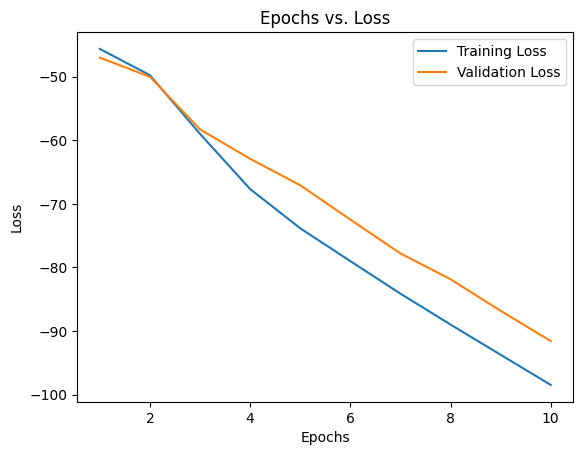

In [ ]:
import matplotlib.pyplot as plt


# Extract the training metrics to get values for the graph
train_acc = Result.history['accuracy']
val_acc = Result.history['val_accuracy']
train_loss = Result.history['loss']
val_loss = Result.history['val_loss']

# Plot epoch vs. accuracy
plt.plot(range(1, epochs+1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs. Accuracy')
plt.legend()
plt.show()

# Plot epoch vs. loss
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs. Loss')
plt.legend()
plt.show()
